<a href="https://colab.research.google.com/github/iimog/master-bioinf-lecture/blob/main/WS_2025/1_image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
1 + 1

2

In [2]:
import skimage as ski

## Daten einlesen

In [4]:
img = ski.io.imread("https://figshare.com/ndownloader/files/34498448")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
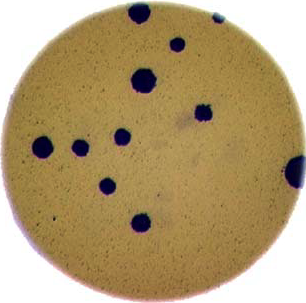

In [6]:
ski.io.imread("colonies-01.tif")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
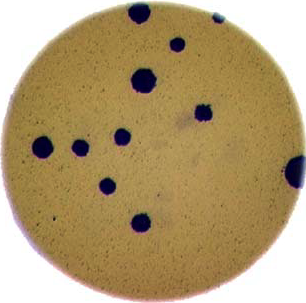

In [5]:
img

## In Graustufen umwandeln

In [8]:
gray_img = ski.color.rgb2gray(img)

/tmp/ipython-input-2372710499.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(gray_img)


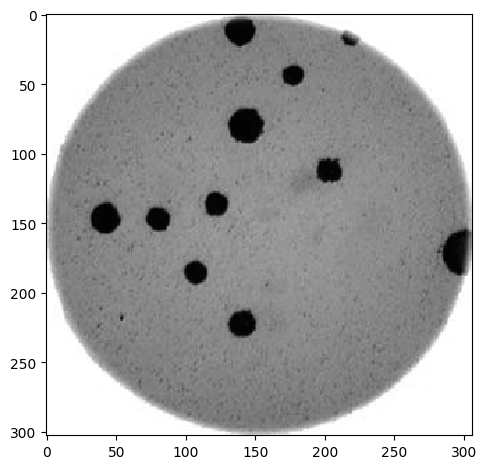

In [9]:
ski.io.imshow(gray_img)

## Weichzeichnen

In [11]:
blurred_img = ski.filters.gaussian(gray_img, sigma=1)

/tmp/ipython-input-3927732226.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(blurred_img)


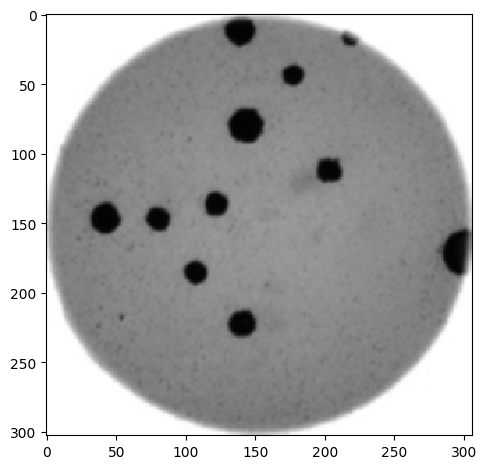

In [12]:
ski.io.imshow(blurred_img)

## Thresholding

In [13]:
import matplotlib.pyplot as plt

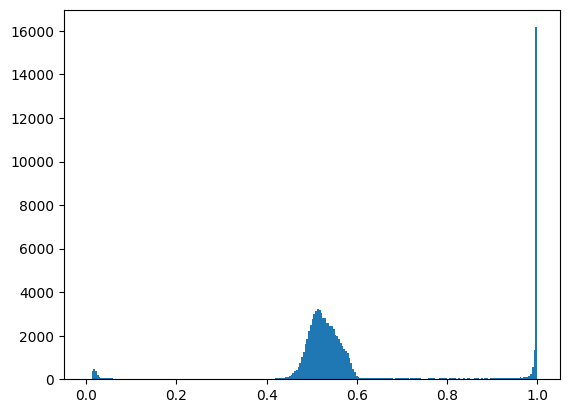

In [20]:
plt.hist(blurred_img.flatten(), bins=256, range=(0,1));

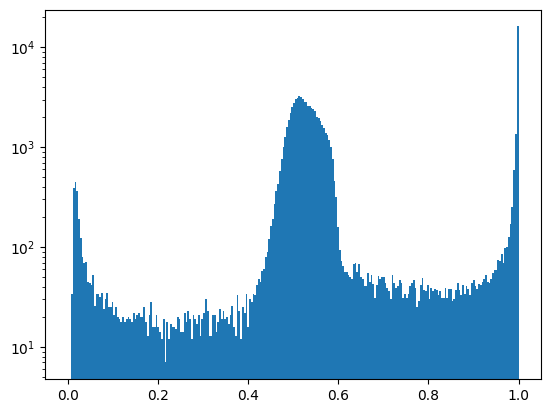

In [19]:
plt.hist(blurred_img.flatten(), bins=256, range=(0,1));
plt.yscale("log")

In [22]:
mask = blurred_img < 0.2

/tmp/ipython-input-1754739712.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(mask)


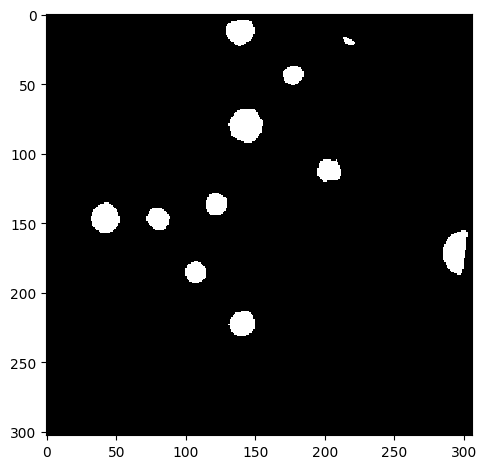

In [23]:
ski.io.imshow(mask)

## Objekte zählen

In [26]:
label_img, count = ski.measure.label(mask, return_num=True)

In [25]:
count

11

/tmp/ipython-input-488277568.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(label_img)
/usr/local/lib/python3.12/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


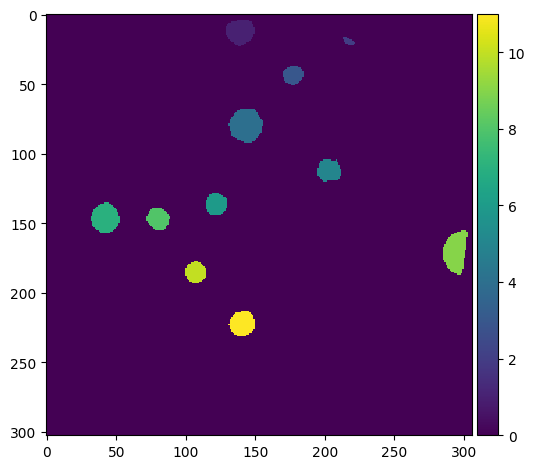

In [27]:
ski.io.imshow(label_img)

/tmp/ipython-input-1913463124.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(ski.color.label2rgb(label_img, img))


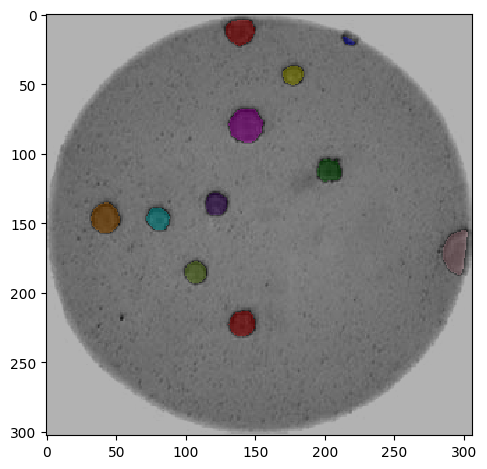

In [29]:
ski.io.imshow(ski.color.label2rgb(label_img, img))

## In Funktion packen

In [30]:
def count_colonies(file_path):
  img = ski.io.imread(file_path)
  gray_img = ski.color.rgb2gray(img)
  blurred_img = ski.filters.gaussian(gray_img, sigma=1)
  mask = blurred_img < 0.2
  label_img, count = ski.measure.label(mask, return_num=True)
  return count

In [31]:
count_colonies("https://figshare.com/ndownloader/files/34498448")

11

In [32]:
count_colonies("https://figshare.com/ndownloader/files/34498442")

74

In [33]:
count_colonies("https://figshare.com/ndownloader/files/34498445")

333